In [1]:
from datetime import datetime
import random
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot as plt

In [2]:
def normalize(x,xmin,xmax):
    return (x-xmin)/(xmax-xmin)

In [3]:
def unnormalize(normalized,xmin,xmax):
    return (normalized*(xmax-xmin)+xmin)

In [108]:
def fitness(w,record):
    '''
    :param w     : single solution (partikel[i])
    :param record: list of record
    :return      : fitness (1/selisih antara prediksi dengna data sebenarnya)
    '''
    REC = 0 #untuk indeks labelled[i]
    LABEL = 1
    
    deviation = 0
    for r in record:
        prediction = 0
#         print (r[REC])
#         print ('a record: ',r) 
               #out: ([0.8477806467478176, 0.8641337759744252, 0.8229435632607894], 0.8252797245788762)
        for i in range (len(r[REC])):
            prediction += r[REC][i]*w[i]
#             print (r[REC][i],w[i][0],end=', ')        
        deviation += abs(prediction - r[LABEL])
#     print('deviation: ',deviation)
#     print ('1/d',1/deviation,'\n')    
    fitness = 1/deviation
    return fitness

In [122]:
def velocity (v_i,phi_cognition,phi_social,p_i, x_i, p_g,VMax):
    """
    :param v_i : vektor velocity untuk partikel ke-i 
    :param p_i : vektor nilai fitness terbaik yang dihasilkan sejauh ini oleh partikel ke-i
    :param x_i : posisi partikel ke-i
    :param p_g : vektor nilai fitness terbaik yang dihasilkan sejauh ini 
                 oleh partikel terbaik dalam topologi ketetanggan
                 
    :param phi_cognition = phi 1 : laju belajar untuk komponen cognition (kecerdasan individu)
    :param phi_social = phi 2: laju belajar untuk koponen social (hubungan social antar individu)     
    
    return :velocity terbaru dari partikel ke-i
    
    """
    r = random.uniform(0,1)
    v = [[]]*len(v_i)
    for d in range (len(v)):
        tmp = v_i[d] + phi_cognition * r * np.subtract(p_i[d],x_i[d]) + phi_social * r * np.subtract(p_g[d],x_i[d])
        v[d] = tmp if (-VMax <= tmp <= VMax) else (tmp/abs(tmp))*VMax
    return v     

In [70]:
def move(x_i , v_i):
    return np.add(x_i,v_i)

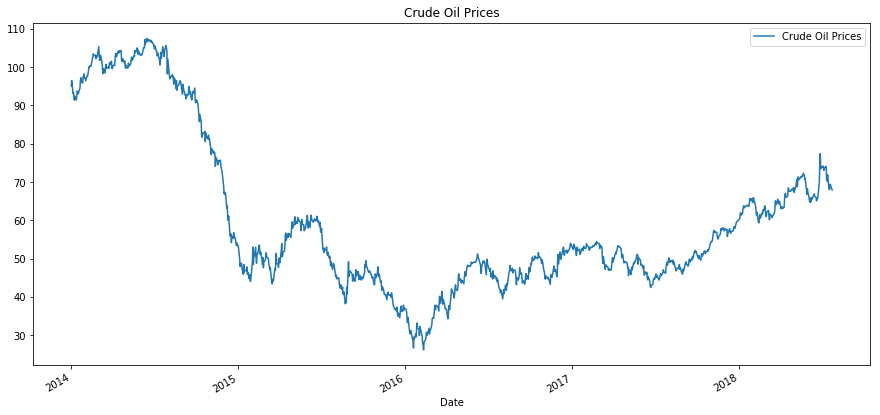

In [7]:
filename = 'crude-oil-prices2.csv'
df = read_csv(filename,skipfooter=2,engine='python')
df['Date'] = to_datetime(df['Date'])
df.set_index('Date').plot(title = 'Crude Oil Prices',figsize=(15,7))
plt.show();

In [8]:
data = []
m1 = min(df['Crude Oil Prices'])
m2 = max(df['Crude Oil Prices'])

for i in range (len(df.index)):
#     data.append([df.iloc[i]['Date'],df.iloc[i]['Crude Oil Prices']])
    tmp = float(df.iloc[i]['Crude Oil Prices'])
    data.append(normalize(tmp,m1,m2))

case = []
for i in range (2,len(data)):
    case.append([data[i-2],data[i-1],data[i]])
    
record = []
for i in range (3,len(data)):
    record.append(data[i])
# labelled = list(zip(case,labelled))
record = list(zip(case,record))
del data

In [127]:
N = 10
X = [] #satu selnya adalah list dari {w1,w2,w3} untuk tiap partikel
P = [] #satu selnya adalah list dari {w1,w2,w3} terbaik untuk tiap partikel
V = [] #satu selnya adalah list dari {v1,v2,v3} atau arah terbang untuk tiap partikel
x_fitness = [] #list of int yang menyimpan fitness dari vektor X
p_fitness = [] #list of int yang menyimpan fitness dari vektor P
VMax = 0.15
phi_1 = 0.25
phi_2 = 0.15

for partikel in range (N):
    X.append([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
    P.append([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
    V.append([random.uniform(-VMax,VMax),random.uniform(-VMax,VMax),random.uniform(-VMax,VMax)])
    x_fitness.append([fitness(X[partikel],record),partikel])
p_fitness = x_fitness [:] #daripada ngitung berkali2
#END OF INITIALIZATION

#Main
for iterasi in range (0,5):
    for partikel in range (N):
        x_fitness[partikel][0] = fitness(X[partikel],record)
        if x_fitness[partikel][0] > p_fitness[partikel][0]:
            P[partikel] = X[partikel][:]
            p_fitness = x_fitness[:]
    best = [max(x_fitness)[0],X[partikel][:]]
    for partikel in range (N):
        V[partikel] = velocity(V[partikel],phi_1,phi_2,P[partikel],X[partikel],P[max(p_fitness)[1]],VMax)
        X[partikel] = move(X[partikel],V[partikel])
    print (x_fitness,'\n')
    


[[0.007853489344573155, 0], [0.036256755651520096, 1], [0.001481565016175709, 2], [0.002200716454559672, 3], [0.02643324363880314, 4], [0.010742581072578678, 5], [0.006213328290588626, 6], [0.038230973178158524, 7], [0.002342214710988862, 8], [0.0015578628909390848, 9]] 

[[0.005486276858193494, 0], [0.01734552604661074, 1], [0.0021773262562243653, 2], [0.0019294623401594005, 3], [0.037709274317795784, 4], [0.040341870229902384, 5], [0.010910472697676078, 6], [0.01961744671438017, 7], [0.0020953685622197306, 8], [0.0016766195671113226, 9]] 

[[0.004124813226388443, 0], [0.043743090076537136, 1], [0.004104258824814504, 2], [0.0017528330078953765, 3], [0.027320404139503405, 4], [0.05439597262180286, 5], [0.009045099812916834, 6], [0.008289822446646299, 7], [0.002057269853903429, 8], [0.0018370842240821251, 9]] 

[[0.0030623050369431347, 0], [0.01517742500762721, 1], [0.01965958397205745, 2], [0.0016293733437307734, 3], [0.025850499691603992, 4], [0.006764049711965675, 5], [0.007283573285

In [128]:
len(p_fitness)

10

In [113]:
VMax

0.15

In [58]:
best

[0.010055915772046797, 1]

In [64]:
a = [2,3,4]
b = [5,6,7]
c = [a[:],b[:]]
a[0] = 0
a

[0, 3, 4]

In [52]:
X

[[[0.7859937476457002], [0.11938563053780193], [0.04579118731891296]],
 [[0.6223285964341999], [0.2826585446148775], [0.7715075566847291]],
 [[0.33143253588724153], [0.8859471740682593], [0.5154578978844789]],
 [[0.09961124608241323], [0.26177024942775273], [0.17234188667961614]],
 [[0.6083555132774991], [0.5331365485482118], [0.44851451536383513]],
 [[0.0412453777245777], [0.3076308356542664], [0.8273559875110524]],
 [[0.1595097801484735], [0.5304317430056684], [0.26371948468518147]],
 [[0.19734197683451749], [0.7414131342271824], [0.47538684129789266]],
 [[0.23113056438638402], [0.6842406396715435], [0.7811537983430109]],
 [[0.14337627923746865], [0.31837587819621016], [0.9763648667803088]]]

In [53]:
P

[[[0.7859937476457002], [0.11938563053780193], [0.04579118731891296]],
 [[0.6223285964341999], [0.2826585446148775], [0.7715075566847291]],
 [[0.33143253588724153], [0.8859471740682593], [0.5154578978844789]],
 [[0.09961124608241323], [0.26177024942775273], [0.17234188667961614]],
 [[0.6083555132774991], [0.5331365485482118], [0.44851451536383513]],
 [[0.0412453777245777], [0.3076308356542664], [0.8273559875110524]],
 [[0.1595097801484735], [0.5304317430056684], [0.26371948468518147]],
 [[0.19734197683451749], [0.7414131342271824], [0.47538684129789266]],
 [[0.23113056438638402], [0.6842406396715435], [0.7811537983430109]],
 [[0.14337627923746865], [0.31837587819621016], [0.9763648667803088]]]

In [54]:
V

[[[-0.026840669393816685], [-0.03741670899087829], [-0.06387361419809896]],
 [[0.1213443802876987], [0.08868178578860941], [-0.047411965549924495]],
 [[-0.12764423412941808], [-0.026518046309545462], [0.08506408609469976]],
 [[0.14327054301677014], [0.09371008962359464], [-0.14631886568893918]],
 [[-0.07322261726367345], [0.07558176845348036], [0.0428198837783651]],
 [[0.09637733332578255], [-0.07856978163762113], [0.12031657885485467]],
 [[-0.07916923330727789], [-0.08935817646065591], [-0.07698647834857177]],
 [[0.044784589454990614], [-0.047761277055315465], [-0.03374421382559617]],
 [[-0.13619040216045858], [0.11526951121980186], [-0.09800523068027225]],
 [[0.03900495249561567], [-0.10247058194488434], [0.10301792600384543]]]

In [59]:
x_fitness

[[0.0021738470292097466, 0],
 [0.010055915772046797, 1],
 [0.0019038439757980848, 2],
 [0.0012805464834836635, 3],
 [0.0016783629489131265, 4],
 [0.002308926825858193, 5],
 [0.0013967092354974205, 6],
 [0.0020732501649834076, 7],
 [0.0027402410906787, 8],
 [0.0014296784773343957, 9]]

In [56]:
p_fitness

[[0.03474776197220357, 0],
 [0.003077171857381969, 1],
 [0.002841253715809705, 2],
 [0.0044843637019236155, 3],
 [0.0035254653355744348, 4],
 [0.01168666900997394, 5],
 [0.038853485839653736, 6],
 [0.005017659582099543, 7],
 [0.0029901731727555946, 8],
 [0.004748890479305099, 9]]

In [45]:
max(p_fitness)

AttributeError: 'float' object has no attribute 'index'

In [19]:
# #START THE FORWARD AND BACKWARD MLP REGRESSOR

# #inisialisasi
# P = 5
# particles = []
# p = [] #particles best known position
# g = [[random.uniform(0,1)],[random.uniform(0,1)],[random.uniform(0,1)]] #swarm best known position
# fit_g = fitness(g,record)

# for i in range (P): #generate individu (posisi folk):
#     tmp = [[random.uniform(0,1)],[random.uniform(0,1)],[random.uniform(0,1)]]
#     particles.append(tmp)
#     p.append(tmp)
#     if (fitness(p[-1],record) < fit_g):
#         g=p[-1]
# VMax = 0.15 #inisialisasi vektor velocity
# velocity = [[random.uniform(-VMax,VMax)],[random.uniform(-VMax,VMax)],[random.uniform(-VMax,VMax)]]


# # """
# # FITNESS ADALAH LIST [nilai fitness,index]
# # """
# fit = [] #inisialisasi fitness
# for i in range (P):
#     fit.append([-1,None])

# #MAIN:
# for iterasi in range (0,1):
#     for i in range (P):
#         new_fit = fitness(particles[i],record) #hitung nilai fitness
#         if (new_fit > fit[i][0]):
#             fit[i]= [new_fit,i]
# #             tmp_fpi = fitness(p[i],record)
# #             if (fit[i] > tmp_fpi):
# #                 p[i] = particles[i]
# #                 if (tmp_fpi > fit_g):
# #                     g = p[i]
# #                     fit_g = tmp_fpi
    
        
        
        
                

    
    
    

# # for i in range (len(particles)):
# #     velocity[i] = update_velocity_i(p_g=)
    
        
        

In [ ]:
#START THE FORWARD AND BACKWARD MLP REGRESSOR

#inisialisasi
S = 10

particles = []
P = []
VMax = 0.15 #inisialisasi vektor velocity
V = [[random.uniform(-VMax,VMax)],[random.uniform(-VMax,VMax)],[random.uniform(-VMax,VMax)]]

for i in range (S): #generate individu (posisi folk):
    particles.append([[random.uniform(0,1)],[random.uniform(0,1)],[random.uniform(0,1)]])
    P.append(particles[-1])

fit = [] #inisialisasi fitness
for i in range (S):
    fit.append([-1,None])
# BSF = [0,None] #[bestFitness , solution]

#MAIN:
for iterasi in range (0,1):
    for i in range (S):
        new_fit = fitness(particles[i],record) #hitung nilai fitness
        fit[i]= [tmp_fitness,i] if (new_fit > fit[i][0]) else fit[i]    
    g = max(fit)
    # BSF = best_particle[0],particles[best_particle[1]] if best_particle[0]>BSF[0] else BSF
    for i in range (S):
        p_g = 
    
        
        

In [ ]:
particles

In [ ]:
p

In [ ]:
g

In [ ]:
velocity

In [ ]:
fit

In [ ]:
max(fit)